In [1]:
import math
import pandas as pd
import numpy as np
import folium as fo
import geopandas as gp

In [2]:
sealevel=pd.read_csv('D:\\MasterDegree1\\Numerical\\Assigment2\\kl_tg_93_08.csv')
sealevel 

,Date,Level
0,1993.042,0.168
1,1993.125,0.041
2,1993.208,0.029
3,1993.292,-0.033
4,1993.375,-0.116
...,...,...
187,2008.625,-0.076
188,2008.708,-0.046
189,2008.792,0.151
190,2008.875,0.323


In [3]:
#sealevel.dtypes
sealevel["Year"] = (sealevel["Date"] - sealevel["Date"]%1).astype(int)
sealevel["Month"] =( ( ( ( sealevel["Date"]%1 )*12 )+1 ) - (( ( ( sealevel["Date"]%1 )*12 )+1 )%1  )  ).astype(int)
sealevel["Day"] = round( ((((sealevel["Date"]%1)*12)+1)%1)*30 ).astype(int)
sealevel

,Date,Level,Year,Month,Day
0,1993.042,0.168,1993,1,15
1,1993.125,0.041,1993,2,15
2,1993.208,0.029,1993,3,15
3,1993.292,-0.033,1993,4,15
4,1993.375,-0.116,1993,5,15
...,...,...,...,...,...
187,2008.625,-0.076,2008,8,15
188,2008.708,-0.046,2008,9,15
189,2008.792,0.151,2008,10,15
190,2008.875,0.323,2008,11,15


In [4]:
sealevel.count()

Date     192
Level    185
Year     192
Month    192
Day      192
dtype: int64

In [5]:
CountNan = sealevel["Level"].isna()
CountNan
len(CountNan) , sum(CountNan)

# How many months having no data (NaN) Ans 192 - 185 = 7 Values 

(192, 7)

In [6]:
# Cut nan data
Cutsealevel = sealevel.dropna()
Cutsealevel

,Date,Level,Year,Month,Day
0,1993.042,0.168,1993,1,15
1,1993.125,0.041,1993,2,15
2,1993.208,0.029,1993,3,15
3,1993.292,-0.033,1993,4,15
4,1993.375,-0.116,1993,5,15
...,...,...,...,...,...
187,2008.625,-0.076,2008,8,15
188,2008.708,-0.046,2008,9,15
189,2008.792,0.151,2008,10,15
190,2008.875,0.323,2008,11,15


In [7]:
#How many months are there in the data set that sea level is below MSL.
below = 0 
for i in Cutsealevel["Level"] :
    if i < 0 :
        below += 1
print("There are" ,below , "months below MSL.")

There are 88 months below MSL.


In [8]:
#How many months are there in the data set that sea level is above MSL.
above = 0 
for j in Cutsealevel["Level"] :
    if j > 0 :
        above += 1
print("There are" ,above , "months above MSL.")

There are 97 months above MSL.


In [9]:
## In which year that the annual average sea level is lowest and highest? ##
MaxYear = Cutsealevel["Year"].max()
MinYear = Cutsealevel["Year"].min()
k = list(range(MinYear,MaxYear+1)) #1993 to 2008
mean = list() 
for m in k :    
    Tempora = Cutsealevel.loc[(Cutsealevel["Year"] == m)]
    mean.append(Tempora["Level"].mean())

YearAvg =dict() #Buil dict to collect Year and AVG MSL to dict as key and values 
for i in range(0,len(k)) :
    YearAvg[k[i]] = mean[i]
YearAvg

{1993: -0.029499999999999995,
 1994: -0.027727272727272725,
 1995: 0.007333333333333333,
 1996: 0.006249999999999999,
 1997: -0.01625,
 1998: -0.01583333333333334,
 1999: -0.012416666666666657,
 2000: -0.04579999999999999,
 2001: -0.0010000000000000033,
 2002: -0.003545454545454546,
 2003: -0.00016666666666667143,
 2004: -4.625929269271485e-18,
 2005: 0.016727272727272726,
 2006: 0.071,
 2007: 0.030250000000000003,
 2008: 0.10090909090909092}

In [10]:
import operator
MaxMSL_Year = max(YearAvg.items(), key=operator.itemgetter(1))[0]
MinMSl_Year = min(YearAvg.items(), key=operator.itemgetter(1))[0]
print("Lowest year = ",MinMSl_Year)
print("Highest year = ",MaxMSL_Year)
print("###############################")

Lowest year =  2000
Highest year =  2008
###############################


In [11]:
### Taking all data into consideration, in which month of the year that the sea level is highest?


In [12]:
MaxMonth = Cutsealevel["Month"].max()
MinMonth = Cutsealevel["Month"].min()
P = list(range(MinMonth,MaxMonth+1)) #1993 to 2008
Mmean = list() 
for q in P :    
    Temporary = Cutsealevel.loc[(Cutsealevel["Month"] == q)]
    Mmean.append(Temporary["Level"].mean())

MonthAvg =dict() #Buil dict to collect Year and AVG MSL to dict as key and values 
for i in range(0,len(P)) :
    MonthAvg[P[i]] = Mmean[i]
MonthAvg

{1: 0.16266666666666665,
 2: 0.12046666666666668,
 3: 0.0699375,
 4: -0.004599999999999999,
 5: -0.10843749999999999,
 6: -0.2119230769230769,
 7: -0.192,
 8: -0.186125,
 9: -0.1025625,
 10: 0.076375,
 11: 0.19474999999999998,
 12: 0.20318750000000002}

In [15]:
MaxMSL_Month = max(MonthAvg.items(), key=operator.itemgetter(1))[0]
MinMSl_Month = min(MonthAvg.items(), key=operator.itemgetter(1))[0]
MonthList = ["Jan" , "Feb" , "Mar" , "Apl" , "May" ,"Jun","Jul" ,"Aug", "Sep" ,"Oct" , "Nov", "Dec"]
print("Lowest Month = ",MonthList[MinMSl_Month-1])
print("Highest Month = ",MonthList[MaxMSL_Month-1])
print("#############################")

Lowest Month =  Jun
Highest Month =  Dec
#############################


In [25]:
#Find the mean of sea level of 4 4-year periods:
#a. 1993-1996,
#b. 1997-2000,
#c. 2001-2004 and
#d. 2005-2008.
#What are the patterns that you can notice?
QuesA = Cutsealevel.loc[(Cutsealevel["Year"]<1997)]
QuesB = Cutsealevel.loc[(Cutsealevel["Year"]==1997)|(Cutsealevel["Year"]==1998)|(Cutsealevel["Year"]==1999)|(Cutsealevel["Year"]==2000)]
QuesC = Cutsealevel.loc[(Cutsealevel["Year"]==2001)|(Cutsealevel["Year"]==2002)|(Cutsealevel["Year"]==2003)|(Cutsealevel["Year"]==2004)]
QuesD = Cutsealevel.loc[(Cutsealevel["Year"]==2005)|(Cutsealevel["Year"]==2006)|(Cutsealevel["Year"]==2007)|(Cutsealevel["Year"]==2008)]
print("question a = ",QuesA["Level"].mean() )
print("question b = ",QuesB["Level"].mean() )
print("question c = ",QuesC["Level"].mean() )
print("question d = ",QuesD["Level"].mean() )

question a =  -0.010553191489361702
question b =  -0.02156521739130435
question c =  -0.0011276595744680873
question d =  0.05417777777777778


In [26]:
print("The average MSL for every 4 years shown last 4 years MSL is rising")

The average MSL for every 4 years shown last 4 years MSL is rising


In [32]:
Cutsealevel["Timestamp"] = pd.to_datetime(Cutsealevel['Day'].astype(str)+' '+ Cutsealevel['Month'].astype(str)+' '+Cutsealevel['Year'].astype(str) )

<ipython-input-32-19b127ac67da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cutsealevel["Timestamp"] = pd.to_datetime(Cutsealevel['Day'].astype(str)+' '+ Cutsealevel['Month'].astype(str)+' '+Cutsealevel['Year'].astype(str) )


<AxesSubplot:xlabel='Timestamp'>

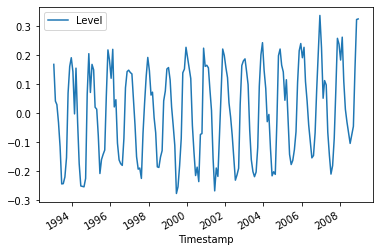

In [37]:
import matplotlib.pyplot as plt
Cutsealevel.plot(x="Timestamp" , y="Level")